In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
BreastResults = pd.read_csv("total_breastCancer_results_norm_SVM.csv")

In [3]:
BreastResults

,Patient to be predicted/left out,Metastasis-Free Subpopulation,Metastasis Subpopulation,Predicted Metastasis,Metastasis Status,Number of Clusters,C Value,SAM Features for each tSNE run on new subset
0,1,99.890000,0.110000,1,1,7,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
1,2,91.451991,8.548009,2,1,7,5.0,"Significant Features : m/z = [6650, 6277, 6980..."
2,3,98.408602,1.591398,1,1,6,1.0,"Significant Features : m/z = [4965, 4999, 5171..."
3,4,99.940000,0.060000,1,1,6,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
4,5,99.733901,0.266099,1,1,6,0.1,"Significant Features : m/z = [5171, 4965, 4999..."
5,6,93.700000,6.300000,2,1,9,0.1,"Significant Features : m/z = [4999, 4965, 5171..."
6,7,100.000000,0.000000,1,1,10,0.1,"Significant Features : m/z = [4965, 5171, 4999..."
7,8,20.470000,79.530000,2,1,9,0.1,"Significant Features : m/z = [4965, 4999, 5171..."
8,9,60.460000,39.540000,2,1,6,0.1,"Significant Features : m/z = [4965, 4999, 5171..."
9,10,62.430000,37.570000,2,1,9,0.1,"Significant Features : m/z = [6650, 11652, 499..."


In [ ]:
# test = BreastResults["Metastasis Subpopulation"][0:11] <= 9.55
# predictions = []
# for i in range(len(test)):
#     if test[i] == True:
#         BreastResults["Predicted Metastasis"][i] = 1
#     else:
#         BreastResults["Predicted Metastasis"][i] = 2

# test = BreastResults["Metastasis Subpopulation"][11::] >= 9.55
# for i in range(11,32):
#     if test[i] == True:
#         BreastResults["Predicted Metastasis"][i] = 2
#     else:
#         BreastResults["Predicted Metastasis"][i] = 1


# predictions = [ ]
# for i in range(len(BreastResults)):
#     if BreastResults["Predicted Metastasis"][i] == BreastResults["Metastasis Status"][i]:
#         predictions.append(1)
#     else:
#         predictions.append(0)

# Correct_classifications = np.unique(predictions,return_counts=True)[1][1]

In [4]:
predictions = [ ]
for i in range(len(BreastResults)):
    if BreastResults["Predicted Metastasis"][i] == BreastResults["Metastasis Status"][i]:
        predictions.append(1)
    else:
        predictions.append(0)

Correct_classifications = np.unique(predictions,return_counts=True)[1][1]

In [5]:
Significant_Proteins = BreastResults["SAM Features for each tSNE run on new subset"].to_numpy()

In [6]:
Significant_proteins_values_list = [ ]

for i in range(len(Significant_Proteins)):
    Significant_proteins_values = Significant_Proteins[i].split('=')[1].split('[')[1].split(']')[0].split(',')
    Significant_proteins_values = [int(i) for i in Significant_proteins_values]
    Significant_proteins_values_list.append(Significant_proteins_values)


In [7]:
from functools import reduce
flattened_Significant_proteins_values = reduce(lambda x, y: x+y, Significant_proteins_values_list)
unique_values, counts = np.unique(flattened_Significant_proteins_values,return_counts=True)

count_sort_ind = np.argsort(-counts)
unique_values = unique_values[count_sort_ind]
counts = counts[count_sort_ind]

In [8]:
counts

array([32, 31, 28, 28, 23, 16, 16, 13, 13, 13, 10,  8,  3,  3,  2,  2,  2,
        2,  2,  1,  1,  1,  1], dtype=int64)

In [9]:
unique_values

array([ 4999,  4965,  5067,  5171,  6980, 11652,  9265,  6277,  6650,
        7009,  4620,  6224, 14011, 11310,  9959,  8419,  8603, 11831,
        8645,  8452, 11607, 11723,  3370])

In [10]:
selected_unique_values = unique_values[0::]
selected_counts = counts[0::]

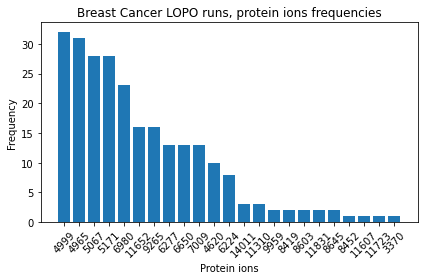

In [11]:
fig = plt.figure()
plt.xticks(rotation=45)
plt.bar(range(len(selected_counts)),selected_counts,tick_label = selected_unique_values)
plt.title("Breast Cancer LOPO runs, protein ions frequencies")
plt.ylabel("Frequency")
plt.xlabel("Protein ions")
plt.tight_layout()

In [12]:
above_80per_idx = [ ]
for i in range(len(counts)):
    if counts[i] >= int(32*0.8):
        above_80per_idx.append(i)

print("Most stable protein ions:" , unique_values[above_80per_idx])
print("Frequency of protein ions apperance:" , counts[above_80per_idx])


Most stable protein ions: [4999 4965 5067 5171]
Frequency of protein ions apperance: [32 31 28 28]


In [13]:
Accuracy = ( Correct_classifications / len(BreastResults) ) * 100
print("Overall Accuracy is:" , Accuracy)

Overall Accuracy is: 78.125


In [14]:
non_metastasis_predictions = predictions[0:11]
metastasis_predictions = predictions[11::]

Correct_non_metastasis_classifications = np.unique(non_metastasis_predictions,return_counts=True)[1][1]
non_metastasis_accuracy = round(( Correct_non_metastasis_classifications / len(non_metastasis_predictions) ) * 100,2)
print("Non-metastasis accuracy is:" , non_metastasis_accuracy)

Correct_metastasis_classifications = np.unique(metastasis_predictions,return_counts=True)[1][1]
metastasis_accuracy = round(( Correct_metastasis_classifications / len(metastasis_predictions) ) * 100,2)
print("Metastasis accuracy is:" , metastasis_accuracy)

Non-metastasis accuracy is: 54.55
Metastasis accuracy is: 90.48


In [15]:
Modified_BreastResults = pd.DataFrame()
Modified_BreastResults["proba"] = BreastResults["Metastasis Subpopulation"]
Modified_BreastResults["Metastasis Status"] = BreastResults["Metastasis Status"]
Modified_BreastResults["Metastasis Status"] = Modified_BreastResults["Metastasis Status"] - 1

No handles with labels found to put in legend.


Breast Cancer SVM: ROC AUC = 0.774891774891775


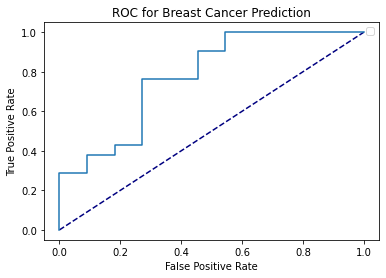

In [30]:
#Calculating ROC curve, AUC, Accuracy Score

# from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve


# y_true = Modified_BreastResults["Metastasis Status"]
# y_score = Modified_BreastResults["proba"]

# #AUC Score
# auc_score = roc_auc_score(y_true , y_score)
# print('Breast Cancer SVM: ROC AUC =', auc_score)


# fpr, tpr, thresholds = roc_curve(y_true, y_score)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.plot(fpr,tpr)
# plt.title("ROC for Breast Cancer Prediction")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')


In [35]:
# Using ROC
from sklearn import metrics
y_true = Modified_BreastResults["Metastasis Status"]
y_score = Modified_BreastResults["proba"]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
idx = np.argmax(tpr - fpr)
print(idx)
print("False positive rate: ",fpr[idx])
print("True positive rate: ",tpr[idx])
print(thresholds[idx])

8
False positive rate:  0.2727272727272727
True positive rate:  0.7619047619047619
9.55


In [45]:
# Using Youden Index , youden index = True positives - False positives
y_true = Modified_BreastResults["Metastasis Status"]
y_score = Modified_BreastResults["proba"]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
youden_j = tpr - fpr
print("Youden Indices are: " , youden_j)
idx = np.argmax(tpr - fpr)
print(idx)
print("False positive rate: ",fpr[idx])
print("True positive rate: ",tpr[idx])
print(thresholds[idx])

Youden Indices are:  [0.         0.04761905 0.28571429 0.19480519 0.29004329 0.1991342
 0.24675325 0.15584416 0.48917749 0.30735931 0.45021645 0.35930736
 0.45454545 0.        ]
8
False positive rate:  0.2727272727272727
True positive rate:  0.7619047619047619
9.55


In [41]:
reference_results = pd.read_excel("C:/Users/omars/Desktop/model_results_reference.xls" , 'Breast Predict LOPO')

from sklearn import metrics
y_true = Modified_BreastResults["Metastasis Status"]
y_score = reference_results["Metastasis Subpopulation"]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
youden_j = tpr - fpr
print("Youden Indices are: " , youden_j)
idx = np.argmax(tpr - fpr)
print("False positive rate: ",fpr[idx])
print("True positive rate: ",tpr[idx])
print(thresholds[idx])

Youden Indices are:  [ 0.          0.04761905  0.28571429  0.19480519  0.33766234  0.15584416
  0.2987013   0.11688312  0.25974026  0.16883117  0.40692641 -0.04761905
  0.        ]
False positive rate:  0.5454545454545454
True positive rate:  0.9523809523809523
1.7139


In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data simulation
from sklearn.datasets import make_classification     # Create a synthetic dataframe
from sklearn.linear_model import LogisticRegression  # Classification model
from sklearn.model_selection import train_test_split # Split the dataframe
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score

In [ ]:
y_test = Modified_BreastResults["Metastasis Status"]
y_pred = reference_results["Metastasis Subpopulation"]
# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
# Calculate the Youden's J statistic
youdenJ = tpr - fpr

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 1.7139 with Youden J statistic: 0.658
FPR: 0.5455, TPR: 0.9524
